<a href="https://colab.research.google.com/github/Daivar/Orders_by_country/blob/main/Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from calendar import monthrange
from collections import defaultdict 

In [30]:
df1= pd.read_csv("sample_orders.csv", infer_datetime_format=True, parse_dates=['Day'], index_col=['Day'])

In [34]:
df1.head()

,Country,City,OrderForCompany,OrderID,Revenue,ProductsCount
Day,,,,,,
2019-01-22,CC,E,False,Z4KCRGWVJ6U4PBS,73.88,47
2019-01-13,CC,E,False,PX1CDR6AH6U4FEU,73.56,58
2019-01-06,CC,E,False,2Q51N5EYE6U4VVV,79.67,57
2019-01-06,CC,E,False,Z6JUX086F6U4RT0,62.50,40
2019-01-20,CC,E,False,8RZX219ZI6U4Q7C,75.98,57


In [57]:
df1.shape

(208000, 6)

False    194247
True      13753
Name: OrderForCompany, dtype: int64

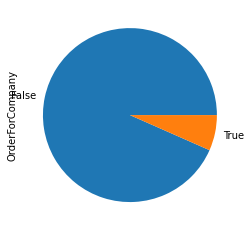

In [73]:
df = df1['OrderForCompany'].value_counts()
df.plot.pie()
df

In [176]:
df2 = df1.groupby(['Country', 'OrderForCompany']).Revenue.sum()
df2

Country  OrderForCompany
AA       False              9121861.25
         True                951989.95
BB       False              2131643.75
         True                 95377.28
CC       False              1305200.14
         True                 40790.97
Name: Revenue, dtype: float64

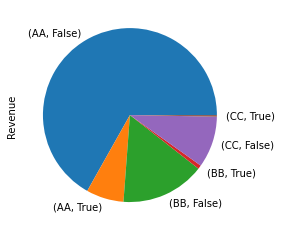

In [180]:
df2.plot.pie()

In [61]:
df1['Country'].value_counts()

AA    160000
BB     32000
CC     16000
Name: Country, dtype: int64

In [62]:
df1['City'].value_counts()

A    97491
B    36551
D    32000
C    25958
E    16000
Name: City, dtype: int64

In [107]:
df1.describe()

,Revenue,ProductsCount
count,208000.000000,208000.000000
mean,65.609920,38.165639
std,26.538433,13.000156
min,20.560000,13.000000
25%,48.020000,29.000000
50%,62.200000,36.000000
75%,75.090000,45.000000
max,2945.620000,215.000000


In [53]:
df1['OrderForCompany'].unique()

array([False,  True])

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208000 entries, 0 to 207999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country          208000 non-null  object 
 1   City             208000 non-null  object 
 2   Day              208000 non-null  int64  
 3   OrderForCompany  208000 non-null  bool   
 4   OrderID          208000 non-null  object 
 5   Revenue          208000 non-null  float64
 6   ProductsCount    208000 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 9.7+ MB


In [36]:
df1.isna().mean()

Country            0.0
City               0.0
OrderForCompany    0.0
OrderID            0.0
Revenue            0.0
ProductsCount      0.0
dtype: float64

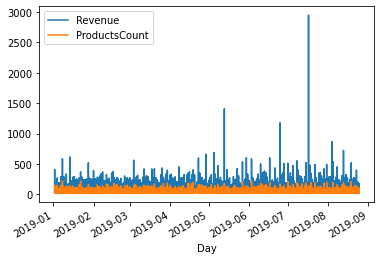

In [82]:
df1.plot()


In [145]:
df1_month = df1.resample('BM').max()
df1_month

,Country,City,OrderForCompany,OrderID,Revenue,ProductsCount
Day,,,,,,
2019-01-31,CC,E,True,ZZY4LDO4K6U4CTW,609.37,215
2019-02-28,CC,E,True,ZZYNE0RSO6U41LP,388.75,177
2019-03-29,CC,E,True,ZZZYIB0A07U4ALB,557.76,177
2019-04-30,CC,E,True,ZZZUAFKHD7U4J7S,656.49,193
2019-05-31,CC,E,True,ZZY7NM8RJ7U42LU,1403.25,198
2019-06-28,CC,E,True,ZZZ1JFXRT7U4WPE,1172.97,213
2019-07-31,CC,E,True,ZZYU9IFI38U43XP,2945.62,204
2019-08-30,CC,E,True,ZZYTL0C688U4E42,864.59,203


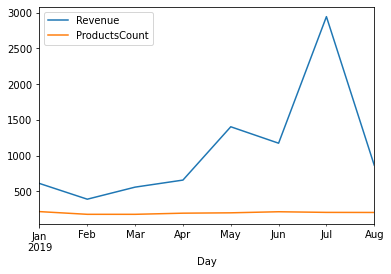

In [146]:
df1_month.plot()

In [147]:
df1_month = df1.resample('BM').mean()
df1_month

,OrderForCompany,Revenue,ProductsCount
Day,,,
2019-01-31,0.059000,64.412070,38.620192
2019-02-28,0.055346,65.003071,38.708500
2019-03-29,0.057920,64.706428,38.472592
2019-04-30,0.065266,65.717209,38.398612
2019-05-31,0.071615,66.086536,38.231423
2019-06-28,0.074545,66.217740,37.747529
2019-07-31,0.074896,66.149830,37.572934
2019-08-30,0.069923,66.531427,37.587846


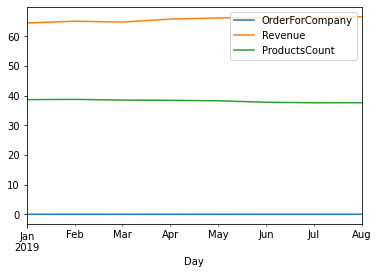

In [148]:
df1_month.plot()

In [143]:
df1_month = df1.resample('BM').sum()
df1_month

,OrderForCompany,Revenue,ProductsCount
Day,,,
2019-01-31,1534,1674713.81,1004125
2019-02-28,1439,1690079.84,1006421
2019-03-29,1418,1584142.78,941886
2019-04-30,1796,1808406.15,1056653
2019-05-31,1862,1718249.93,994017
2019-06-28,1825,1621142.70,924135
2019-07-31,2061,1820311.03,1033932
2019-08-30,1818,1729817.10,977284


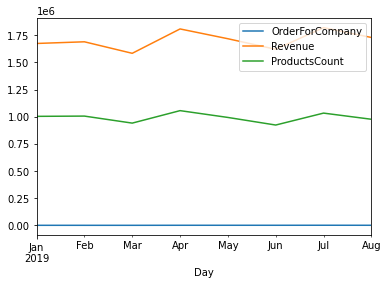

In [144]:
df1_month.plot()

In [102]:
df3 = df1.groupby(['Country', 'OrderForCompany', 'Revenue']).ProductsCount.mean()
df3

Country  OrderForCompany  Revenue
AA       False            20.56       14.0
                          20.57       13.0
                          20.86       13.0
                          21.56       14.0
                          21.64       13.0
                                     ...  
CC       True             228.30      40.0
                          234.54     123.0
                          243.88      27.0
                          256.50      26.0
                          448.40     136.0
Name: ProductsCount, Length: 48376, dtype: float64

In [137]:
customers = df1.groupby(['Country','City']).sum()
customers

OrderForCompany     Revenue  ProductsCount
Country City                                            
AA      A                9545  6390623.23        3626252
        B                1752  2165305.13        1286844
        C                 891  1517922.84         908016
BB      D                1116  2227021.03        1335615
CC      E                 449  1345991.11         781726

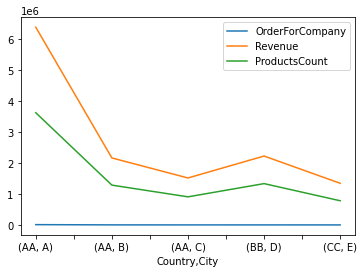

In [138]:
customers.plot()

In [140]:
customers = df1.groupby(['Country','City']).mean()
customers

OrderForCompany    Revenue  ProductsCount
Country City                                           
AA      A            0.097906  65.550904      37.195762
        B            0.047933  59.240654      35.206807
        C            0.034325  58.476109      34.980199
BB      D            0.034875  69.594407      41.737969
CC      E            0.028063  84.124444      48.857875

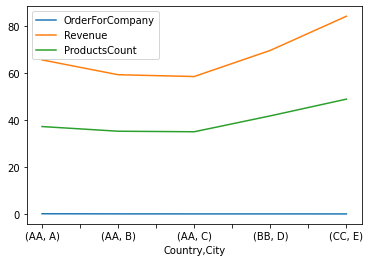

In [141]:
customers.plot()